In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandasql as ps
from sqlalchemy import text
from matplotlib.colors import Normalize
warnings.filterwarnings('ignore')

### Reading in the tables

In [2]:
abyss = pd.read_csv('csv_files/abyss.csv')
abyss.rename(columns={'Version ->': 'Name'}, inplace=True)
abyss.head()

,Name,Rarity,Vision,1.5,1.6,2,2.1,2.2,2.3,2.4,...,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,Average usage
0,Albedo,5,Geo,55.56,27.6,51.3,47.4,44.1,61.4,42.0,...,24.6,17.9,15.7,30.1,8.6,5.4,7.9,5.9,3.6,30.88
1,Alhaitham,5,Dendro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.0,56.6,57.6,40.9,64.8,55.18
2,Amber,4,Pyro,1.90,1.5,0.3,0.2,0.7,0.8,1.0,...,0.2,0.4,0.5,1.0,0.2,0.1,0.1,0.2,0.2,0.56
3,Arataki Itto,5,Geo,NaN,NaN,NaN,NaN,NaN,NaN,39.0,...,17.3,16.9,15.2,39.6,10.6,6.4,11.1,8.2,5.3,20.44
4,Baizhu,5,Dendro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.5,59.4,56.45


In [3]:
elemental_usage = pd.read_csv('csv_files/elemental_usage.csv')
elemental_usage

,Vision,1.5,1.6,2,2.1,2.2,2.3,2.4,2.5,2.6,...,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,Average usage
0,Anemo,59.38,61.58,40.90,41.40,39.97,33.43,26.50,26.77,36.77,...,24.01,20.07,19.64,16.52,15.30,12.42,11.72,15.99,12.67,28.682500
1,Cryo,35.01,28.76,26.91,28.50,30.75,27.52,30.24,21.27,33.97,...,24.49,20.43,17.50,11.22,5.63,11.10,8.17,10.80,10.41,21.014500
2,Dendro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.70,20.45,28.47,29.37,33.86,33.86,29.40,26.50,30.25,26.984444
3,Electro,12.24,7.74,5.90,11.99,18.77,19.46,16.43,23.90,15.82,...,14.24,16.90,19.66,19.47,17.09,18.55,17.90,15.10,16.42,15.813000
4,Geo,40.72,33.52,40.70,38.12,34.40,39.02,29.57,38.43,12.83,...,20.57,16.23,15.57,28.44,14.84,11.73,12.77,12.09,9.01,25.049000
5,Hydro,37.70,34.50,43.48,41.25,41.58,42.62,47.80,43.20,51.28,...,46.86,34.49,39.00,37.17,31.66,35.21,39.61,31.84,42.52,40.315000
6,Pyro,29.57,27.14,21.01,24.10,27.48,25.13,23.70,24.47,12.58,...,27.64,20.98,18.55,22.12,16.21,22.60,16.65,22.05,12.92,22.821000


In [4]:
char = pd.read_csv('csv_files/characters.csv')
char.head()

,Name,rarity,vision,weapon_type,constellation,birthday,special_dish,affiliation,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Element,Weapon,Nation,Model Type
0,Albedo,5,Geo,Sword,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,13225,251,876,Geo DMG Bonus,28.80%,Geo,Sword,Mondstadt,Medium Male
1,Alhaitham,5,Dendro,Sword,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,13348,313,781,Dendro DMG Bonus,28.80%,Dendro,Sword,Sumeru,Tall Male
2,Amber,4,Pyro,Bow,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,9461,223,600,ATK,24.00%,Pyro,Bow,Mondstadt,Medium Female
3,Arataki Itto,5,Geo,Claymore,Taurus Iracundus,01-Jun,Way of the Strong,Arataki Gang,12858,227,959,CRIT Rate,19.20%,Geo,Claymore,Inazuma,Tall Male
4,Baizhu,5,Dendro,Catalyst,Lagenaria,25-Apr,Heat-Quelling Soup,Bubu Pharmacy,13348,192,499,HP,28.80%,Dendro,Catalyst,Liyue,Tall Male


In [5]:
revenue = pd.read_csv('csv_files/revenue.csv')
revenue = revenue.astype({'1':'int', '2':'int', '3':'int', '4':'int'})
for col in revenue.columns:
    if col != 'Name' and col != 'Vision':
        revenue[col] /= 100000
revenue = revenue.round(decimals=2)
revenue.head()

,Name,Vision,1,2,3,4,Total
0,Hu Tao,Pyro,124.82,252.27,188.49,0.0,565.57
1,Keqing,Electro,95.06,0.00,0.00,0.0,95.06
2,Kazuha,Anemo,98.07,216.07,126.50,0.0,440.65
3,Nahida,Dendro,314.69,200.82,0.00,0.0,515.51
4,Yelan,Hydro,233.13,277.08,0.00,0.0,510.20


# Questions I wish to answer:
1. What character/element had the highest overall usage rate/revenue? (and lowest)
3. Do characters generally perform better on their rerun banners?
4. Do the usage rate of elements have a pattern/trend?
5. Is there anything common between the top 5 most used characters?
6. What nation has the strongest characters? (determined by flat stats)
7. What affiliation is the most common within the playable characters? (i.e Knights of Favonius, Arataki Gang etc.)

### 1) What character had the highest overall usage rate/revenue? (and lowest)

In [6]:
# Character with the highest average usage rate:

query = '''
SELECT Name
FROM abyss
WHERE `Average usage` = (SELECT MAX(`Average usage`) FROM abyss);
'''
ps.sqldf(query, locals())

,Name
0,Nahida


In [7]:
# Character with the lowest average usage rate:

query = '''
SELECT Name
FROM abyss
WHERE `Average usage` = (SELECT MIN(`Average usage`) FROM abyss);
'''
ps.sqldf(query, locals())

,Name
0,Candace


In [8]:
# Character with the highest TOTAL revenue:

query = '''
SELECT Name
FROM revenue
WHERE Total = (SELECT MAX(Total) FROM revenue);
'''
ps.sqldf(query, locals())

,Name
0,Shogun


In [9]:
# Character with the Lowest TOTAL revenue:

query = '''
SELECT Name
FROM revenue
WHERE Total = (SELECT MIN(Total) FROM revenue);
'''
ps.sqldf(query, locals())

,Name
0,Baizhu


#### Creating a new column in the revenue table to contain the revenue per banner

In [10]:
revenue['revenue per banner'] = 0

for index, char in enumerate(revenue['Name']):
    num = 0
    
    if revenue['1'][index] != 0:
        num += 1
    if revenue['2'][index] != 0:
        num += 1
    if revenue['3'][index] != 0:
        num += 1
    if revenue['4'][index] != 0:
        num += 1
    revenue['revenue per banner'][index] = revenue['Total'][index] / num
revenue['revenue per banner'] = revenue['revenue per banner'].round(2)
revenue

,Name,Vision,1,2,3,4,Total,revenue per banner
0,Hu Tao,Pyro,124.82,252.27,188.49,0.00,565.57,188.52
1,Keqing,Electro,95.06,0.00,0.00,0.00,95.06,95.06
2,Kazuha,Anemo,98.07,216.07,126.50,0.00,440.65,146.88
3,Nahida,Dendro,314.69,200.82,0.00,0.00,515.51,257.76
4,Yelan,Hydro,233.13,277.08,0.00,0.00,510.20,255.10
5,Ayaka,Cryo,164.51,359.39,164.96,0.00,688.86,229.62
6,Itto,Geo,134.04,125.87,27.94,0.00,287.85,95.95
7,Xiao,Anemo,131.45,101.69,88.64,43.00,364.79,91.20
8,Zhongli,Geo,162.65,102.15,148.25,113.17,526.22,131.56
9,Klee,Pyro,227.50,70.06,32.01,17.84,347.41,86.85


In [11]:
# Character with the highest revenue per banner:

query = '''
SELECT Name
FROM revenue
WHERE `revenue per banner` = (SELECT MAX(`revenue per banner`) FROM revenue);
'''
ps.sqldf(query, locals())

,Name
0,Shogun


In [12]:
# Character with the lowest revenue per banner:

query = '''
SELECT Name
FROM revenue
WHERE `revenue per banner` = (SELECT MIN(`revenue per banner`) FROM revenue);
'''
ps.sqldf(query, locals())

,Name
0,Albedo


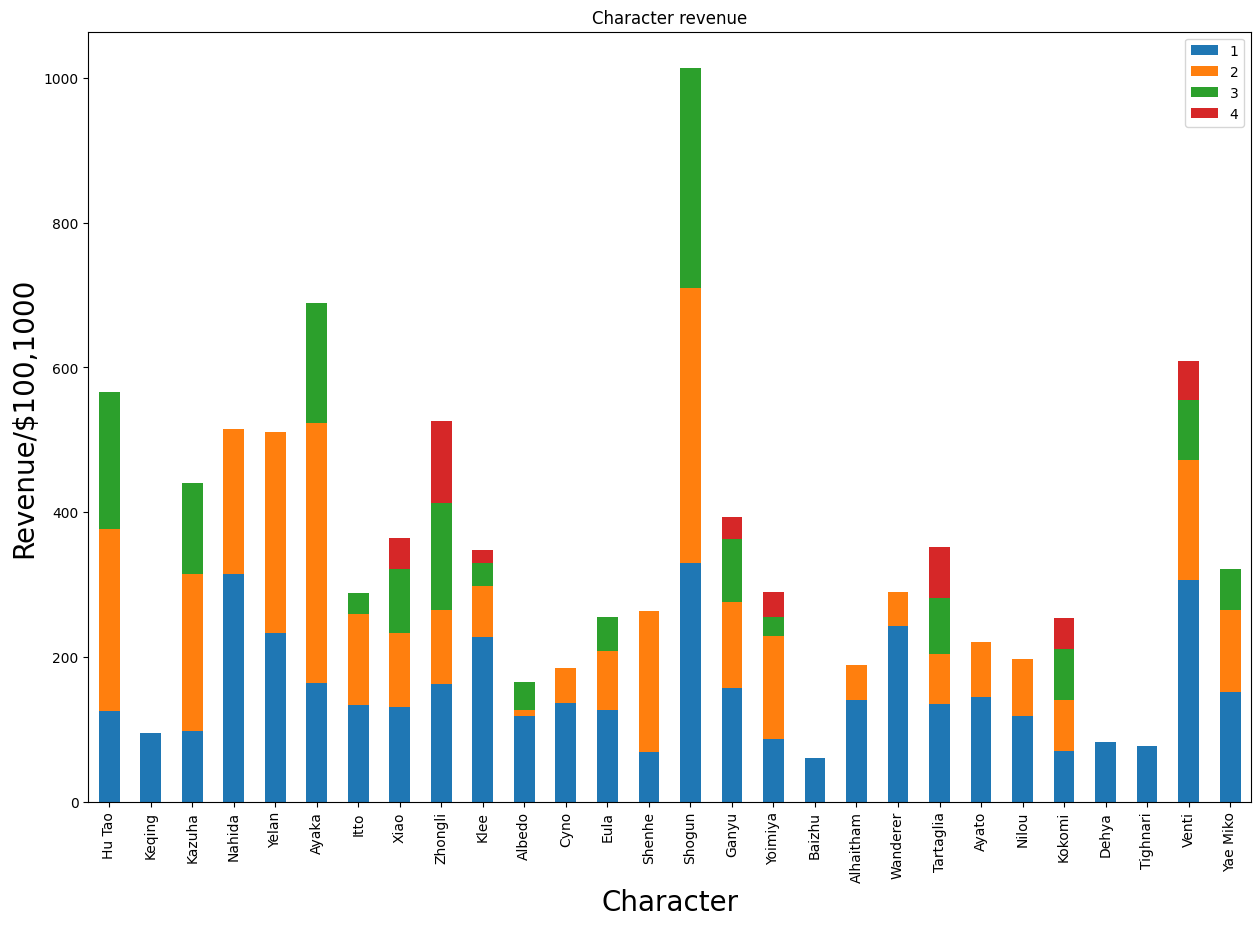

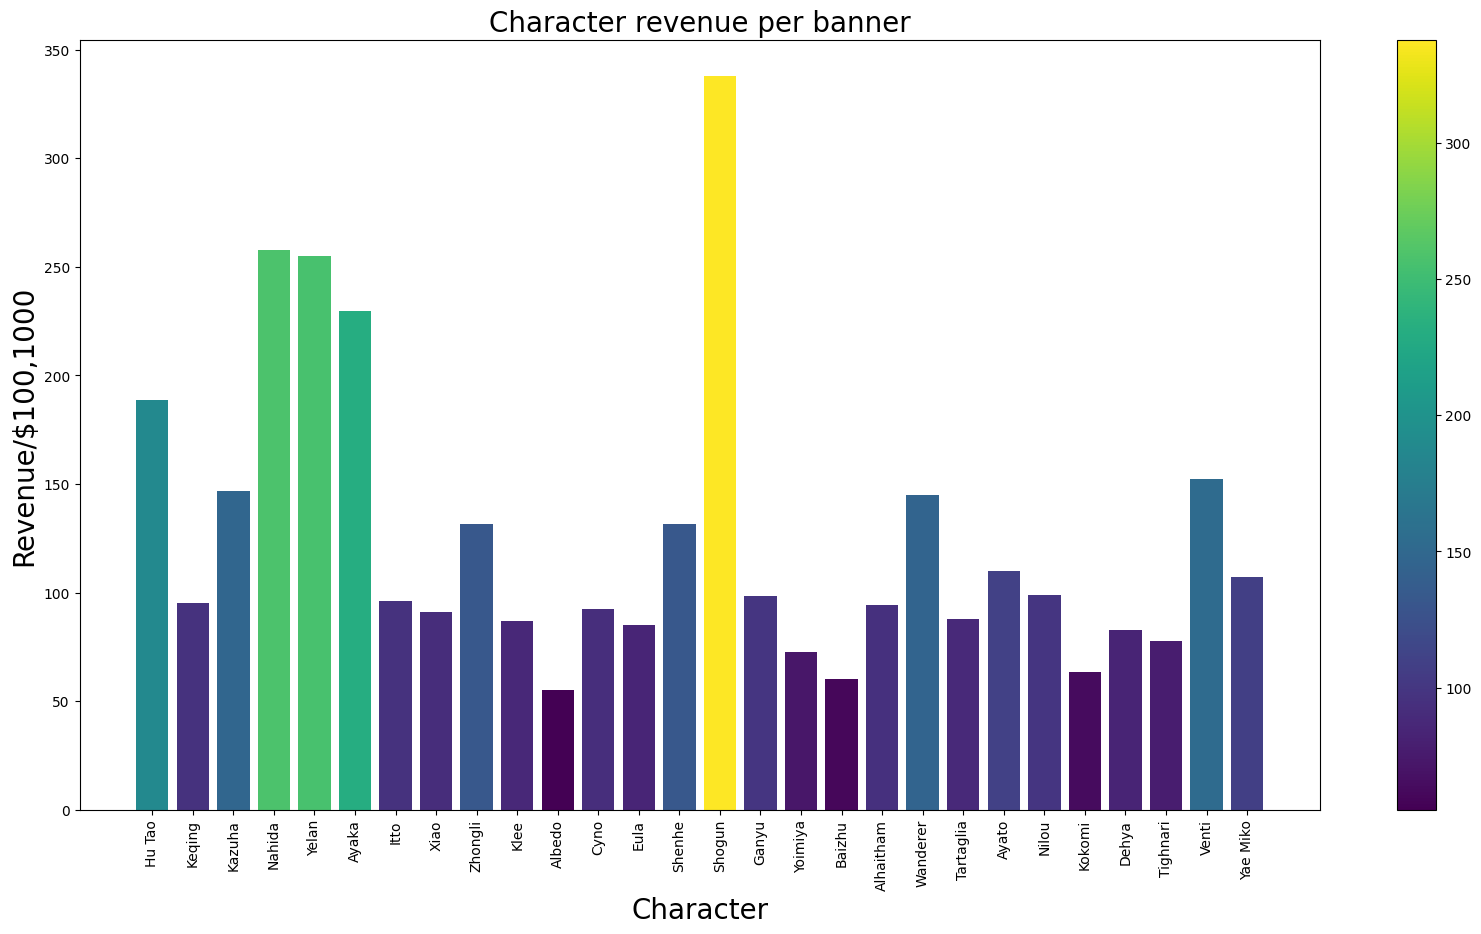

In [22]:
revenue.drop(columns=['Total', 'revenue per banner', 'Vision']).plot(x='Name', kind='bar', stacked=True, title='Character revenue', figsize=(15,10))
plt.xlabel('Character', fontsize=20)
plt.ylabel('Revenue/$100,1000', fontsize=20)
plt.show()

df2 = revenue.drop(columns=['Total', '1', '2', '3', '4','Vision'])
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=min(df2['revenue per banner']), vmax=max(df2['revenue per banner']))
colors = [cmap(norm(value)) for value in df2['revenue per banner']]

plt.figure(figsize=(20,10))
plt.bar(df2['Name'], df2['revenue per banner'], color=colors)
plt.title('Character revenue per banner', fontsize = 20)
plt.xlabel('Character', fontsize=20)
plt.ylabel('Revenue/$100,1000', fontsize=20)
plt.xticks(rotation='vertical')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)

plt.show()

#### From looking at the first bar chart above, we can see that some characters generate more revenue during their reruns and some characters don't. There doesn't seem to a specific trend, it mainly depends on the character.

The second bar chart allows us the clearly see more popular 5 star characters
 

### What element had the highest overall usage rate/revenue? (and lowest)

In [14]:
# Element with the highest average usage rate:

query = '''
SELECT Vision
FROM elemental_usage
WHERE `Average usage` = (SELECT MAX(`Average usage`) FROM elemental_usage);
'''
ps.sqldf(query, locals())

,Vision
0,Hydro


In [15]:
# Element with the lowest average usage rate:

query = '''
SELECT Vision
FROM elemental_usage
WHERE `Average usage` = (SELECT MIN(`Average usage`) FROM elemental_usage);
'''
ps.sqldf(query, locals())

,Vision
0,Electro


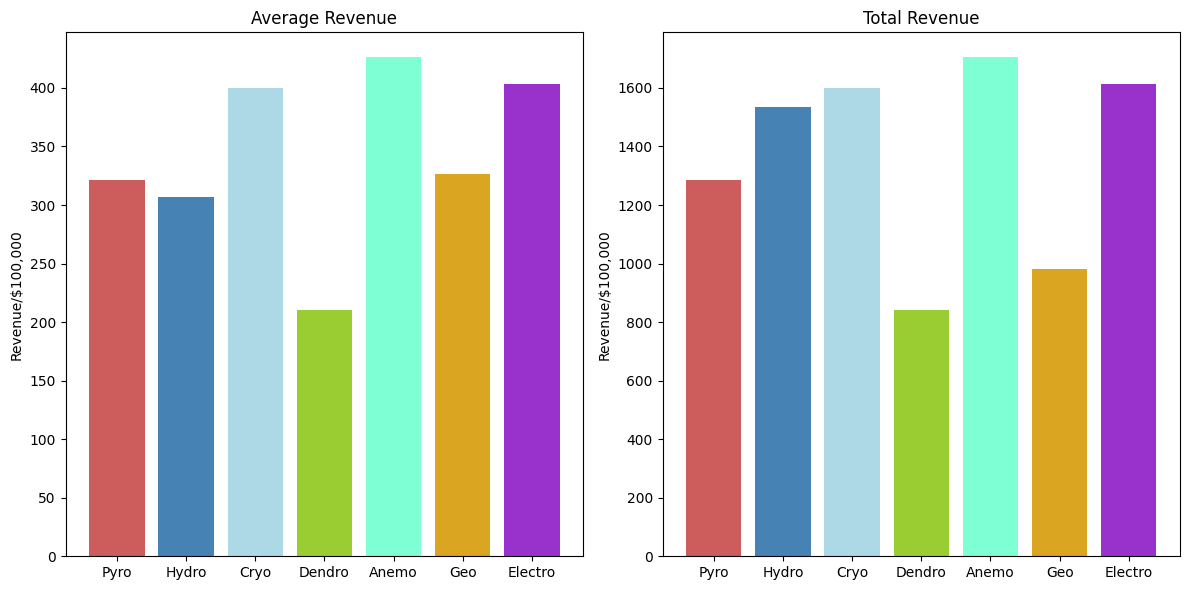

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colors = ['indianred', 'steelblue', 'lightblue', 'yellowgreen', 'aquamarine', 'goldenrod', 'darkorchid']
elements = []
elements2 = []
cols = ['Pyro', 'Hydro', 'Cryo', 'Dendro', 'Anemo', 'Geo', 'Electro']

# Average revenue chart
for vision in cols:
    elements.append(revenue.loc[revenue['Vision'] == vision, 'Total'].mean())       
df = pd.DataFrame({'Vision' : cols,
                  'Revenue': elements})

axs[0].bar(df['Vision'], df['Revenue'], color=colors)
axs[0].set_title("Average Revenue")
axs[0].set_ylabel("Revenue/$100,000")

# Total revenue chart
for vision in cols:
    elements2.append(revenue.loc[revenue['Vision'] == vision, 'Total'].sum())
df = pd.DataFrame({'Vision': cols,
                  'Revenue': elements2})

axs[1].bar(df['Vision'], df['Revenue'], color=colors)
axs[1].set_title("Total Revenue")
axs[1].set_ylabel("Revenue/$100,000")

plt.tight_layout()
plt.show()